In [1]:
import numpy as np
import matplotlib.pyplot as plt
from species import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


In [134]:
# Get names of the species
data = open('species')
Name = np.zeros(500).astype(np.str)
length=len('krome_idx_')
i=0
while 1:
    line = data.readline()
    if not line:
        break
    line=line.strip('\n')
    temp=line[length:line.find(' ')]
    if (temp[-1]=='J'):
        temp=temp[0:-1]+'j'
    Name[i]=temp
    i += 1

In [135]:
def deal_with(data):
    leng=5
    l=len(data[:,1])
    dat=data
    small,big=np.zeros((l,leng)),np.zeros((l,leng))
    big_index,small_index=np.zeros((l,leng)),np.zeros((l,leng))
    for i in range(l):
        dati=dat[i,:]
        sor1 = dati.argsort()[1:leng+1] #sort, find the smallest
        sor2 = dati.argsort()[-1-leng:-1] #biggest
        big_index[i,:]=sor2+1
        small_index[i,:]=sor1+1
        for j in range(leng):
            big[i,j]=dati[sor2[j]]
            small[i,j]=dati[sor1[j]]    
    return(big,small,big_index,small_index)

In [136]:
def read_name(index):
    name=np.zeros((int(l/453),5)).astype(np.str)
    for i in range(int(l/453)):
        for j in range(5):
            name[i,j]=Name[int(index[i,j]-1)]
    return(name)

In [159]:
def draw_evo(data, *spe):
    for i in spe:
        if not i in Name:
            print('Name', i, 'is not valid!')
            return
        else:
            T = data[:,0]
            y = data[:,eval('krome_idx_' + i)]
            Y = np.log10(abs(y))
            plt.semilogx(T, Y, label = i)
            plt.xlabel(r'$r$ (yr)')
            plt.ylabel(r'$\log\delta$ (per hydrogen atom)')

In [167]:
def info(t_data, *dis):
    for i in dis:
        b, s, b_in, s_in = deal_with(t_data[i-1][:, 1:454])
        b_name=read_name(b_in)
        s_name=read_name(s_in)
        print('dis=', i, 'kpc')
        print('Formation')
        print(b_name)
        #print(b)
        print('Destruction')
        print(s_name)
        #print(s)
        print()

In [126]:
# 别动！很慢！！！
tr_raw = []
for i in range(8):
    temp = np.loadtxt('Trace'+str(i+1))
    tr_raw.append(temp)
# 别动！很慢！！！

In [161]:
l = len(tr_raw[0])
tr = np.array(tr_raw).reshape(8,int(l/453),453,454)
t_data = []
for i in range(8):
    t_data.append(tr[i, :, krome_idx_C-1, :])
t_data[0]

array([[0.00000000e+00, 5.04418567e-10, 5.52789033e-36, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+03, 3.89875880e-12, 2.94150744e-38, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.59374246e+03, 2.97190591e-12, 1.63162950e-38, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.89746957e+05, 2.32417888e-12, 3.46752825e-38, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04840021e+06, 2.32417889e-12, 3.48124126e-38, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.31302261e+06, 2.32417889e-12, 3.48124389e-38, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [168]:
info(t_data, 1, 8)

dis= 1 kpc
Formation
[['MG' 'CFj' 'CH2j' 'S' 'E']
 ['CHj' 'S' 'CH3j' 'Cj' 'CH2j']
 ['S' 'CHj' 'CH3j' 'Cj' 'CH2j']
 ['S' 'CHj' 'CH3j' 'Cj' 'CH2j']
 ['S' 'CHj' 'CH3j' 'Cj' 'CH2j']
 ['CHj' 'S' 'CH3j' 'Cj' 'CH2j']
 ['CHj' 'S' 'CH3j' 'Cj' 'CH2j']
 ['CHj' 'S' 'CH3j' 'Cj' 'CH2j']
 ['CHj' 'S' 'CH3j' 'Cj' 'CH2j']
 ['CHj' 'S' 'CH3j' 'Cj' 'CH2j']
 ['CHj' 'S' 'CH3j' 'Cj' 'CH2j']]
Destruction
[['H3j' 'H2' 'H2j' 'OH' 'SIH']
 ['H3j' 'H2' 'H2j' 'CH2' 'OH']
 ['H3j' 'H2' 'H2j' 'OH' 'O2']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']
 ['H3j' 'H2' 'H2j' 'O2' 'OH']]

dis= 8 kpc
Formation
[['CH' 'CH2j' 'CFj' 'S' 'Cj']
 ['MG' 'SI' 'CFj' 'S' 'E']
 ['O' 'Cj' 'C2' 'CN' 'N']
 ['O' 'C2' 'CH3j' 'CN' 'E']
 ['O' 'C2' 'CH3j' 'CN' 'E']
 ['O' 'CH3j' 'C2' 'CN' 'E']
 ['O' 'C2' 'CH3j' 'CN' 'N']
 ['S' 'Cj' 'CN' 'N' 'HCOj']
 ['H' 'CH' 'CO' 'Cj' 'HCOj']
 ['H' 'CH'

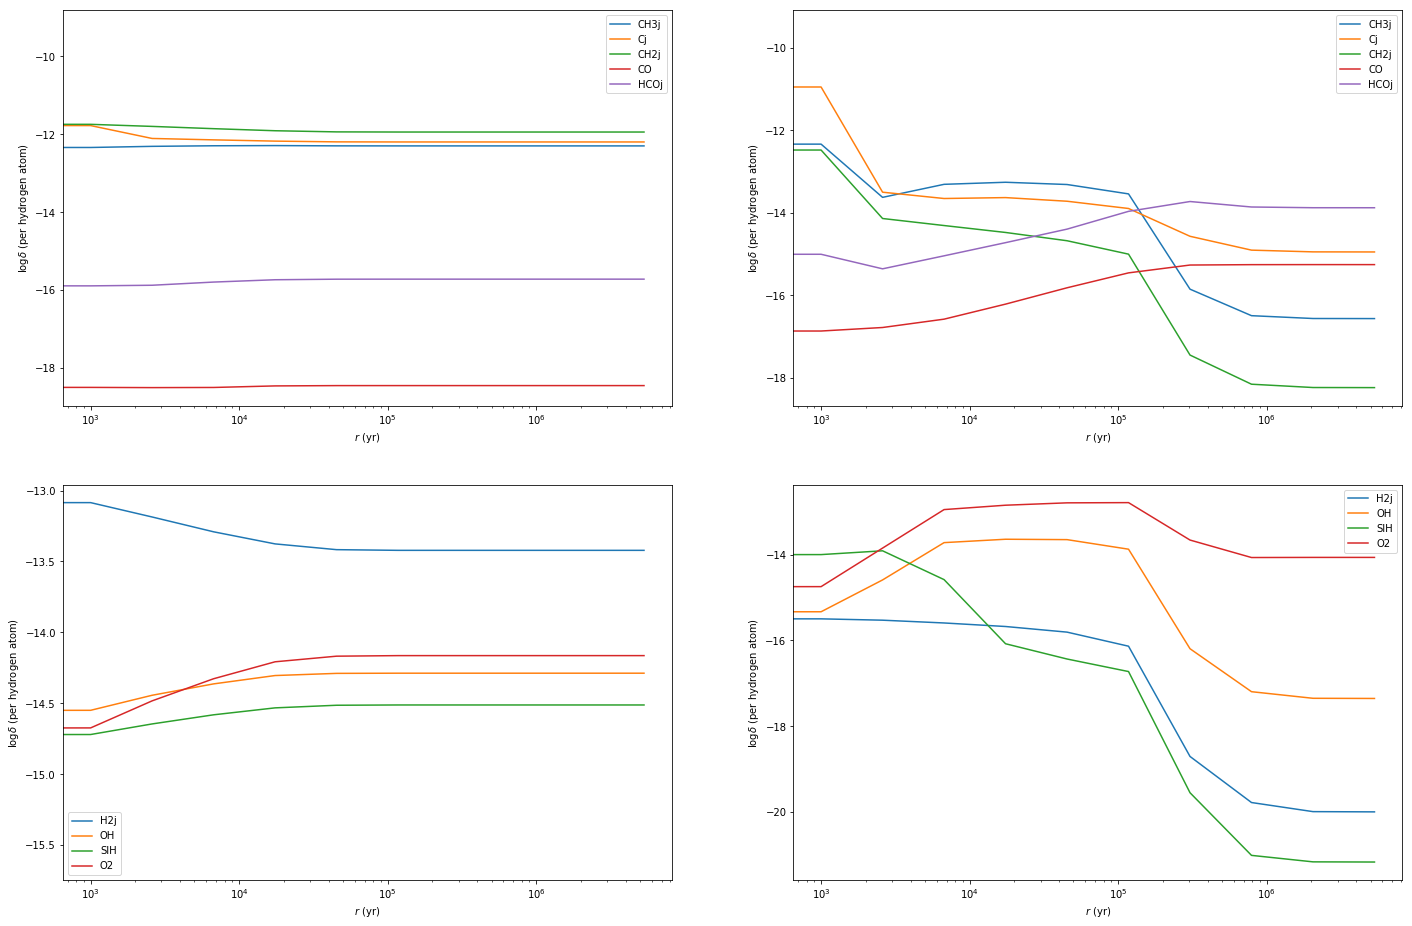

In [174]:
plt.figure(figsize=(24,16))
plt.subplot(221)
draw_evo(t_data[0], 'CH3j', 'Cj', 'CH2j', 'CO', 'HCOj')
plt.legend()
plt.subplot(222)
draw_evo(t_data[7], 'CH3j', 'Cj', 'CH2j', 'CO', 'HCOj')
plt.legend()
plt.subplot(223)
draw_evo(t_data[0], 'H2j', 'OH', 'SIH', 'O2')
plt.legend()
plt.subplot(224)
draw_evo(t_data[7], 'H2j', 'OH', 'SIH', 'O2')
plt.legend()